In [5]:
%matplotlib inline
#Librerías que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
from scipy.optimize import root
import scipy.linalg as la

# Ecuación diferencial

- Resuelve de forma aproximada el problema siguiente:
$$
y'' = y + \frac{1}{1+5x^2}
$$
$$
y(0)=0, y(1)=1
$$
- Explica qué técnica has usado, y por qué.

> - __Es un problema de contorno. Podemos usar el método del disparo, o elementos finitos, por ejemplo. Sin embargo, para el método de Elementos Finitos sólo hemos visto ejemplos con condiciones de contorno homogéneas, así que usaremos la técnica del disparo.__

In [6]:
def fun(x,ys):
    y, yp = ys
    return [yp, y  + 1/(1 + 5*x**2)]

#Esta línea define x0, xf (números) y x_span (una lista con esos dos mismos números)
x0, xf = x_span = [0, 1]
alpha, beta = 0, 1

> - __Definimos la función `NLS` cuya raíz es la velocidad inicial que necesitamos para que al resolver el PDI se cumpla la condición de contorno en el extremo derecho.__
> - __Encontramos la raíz de `NLS` con una llamada a `fsolve`.__

In [7]:

def disparo(v):
    y0 = [alpha, v]
    #Usamos t_eval=[xf] porque solo nos interesa el valor en el extremo derecho
    #(por ahora)
    sol = integ.solve_ivp(
        fun, x_span, y0, 
        method='RK45',
        t_eval=[xf])
    
    return sol['y'][0,-1] - beta

sol_disparo = root(disparo, 0)
sol_disparo

    fjac: array([[-1.]])
     fun: 4.440892098500626e-16
 message: 'The solution converged.'
    nfev: 15
     qtf: array([3.96621624e-10])
       r: array([-1.17511767])
  status: 1
 success: True
       x: array([0.53569744])

> - __Resolvemos el PVI con la velocidad inicial que encontramos antes.__

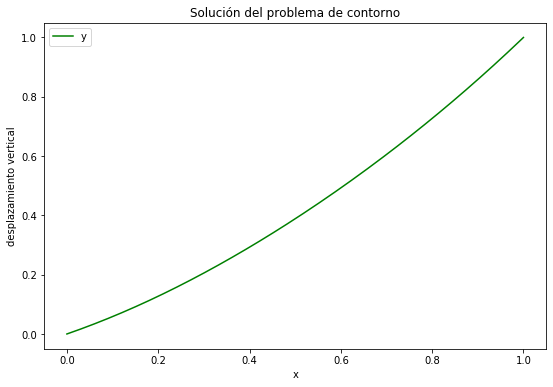

In [6]:
vel_x0 = sol_disparo['x']
y0 = [alpha, vel_x0]
Nx = 200
xs = np.linspace(x0,xf, Nx)
solNL = integ.solve_ivp(
    fun, x_span, y0, 
    method='RK45',
    t_eval=xs)

ys_NL = solNL['y'][0,:]

plt.figure(figsize=(9,6))
plt.plot(xs, ys_NL, 'g', label='y')
plt.xlabel('x')
plt.ylabel('desplazamiento vertical')
plt.title('Solución del problema de contorno')
plt.legend()